In [1]:
import sympy
sympy.init_printing()

import sympy.plotting as plt
%matplotlib inline

from IPython.display import display, Math

import numpy as np

In [66]:
t, s = sympy.symbols('t, s', real = True)
a = sympy.symbols('a', real=True, positive=True)


In [13]:
#q1a
f = t * t
display(sympy.laplace_transform(f, t, s)[0])

In [15]:
#q1b
f = sympy.exp(-a*t)+sympy.exp(-3*a*t)
display(sympy.laplace_transform(f, t, s)[0])

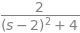

In [4]:
#q1c
f = sympy.exp(2*t)*sympy.sin(2*t)
display(sympy.laplace_transform(f, t, s)[0])

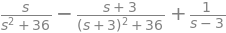

In [17]:
#q1d
f = sympy.exp(3*t) + sympy.cos(6*t) - sympy.exp(-3*t)*sympy.cos(6*t);
display(sympy.laplace_transform(f, t, s)[0])

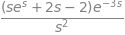

In [9]:
#q1e
f = sympy.Heaviside(t-2) + 2*sympy.Heaviside(t-3) - 2*(t-3)*sympy.Heaviside(t-3)
display(sympy.laplace_transform(f, t, s)[0])

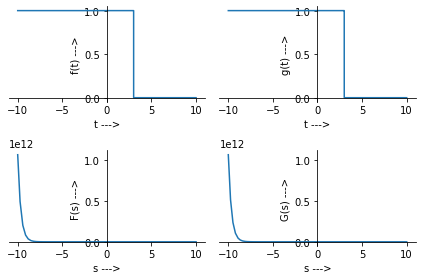

In [55]:
#q2
f = sympy.Heaviside(t)*sympy.Heaviside(3-t)
p1 = plt.plot(f, xlabel='t --->', ylabel='f(t) --->', show=False)
g = sympy.Heaviside(t) - sympy.Heaviside(t-3)
p2 = plt.plot(g, xlabel='t --->', ylabel='g(t) --->', show=False)
F = sympy.laplace_transform(f, t, s)[0]
G = sympy.laplace_transform(g, t, s)[0]
p3 = plt.plot(F, xlabel='s --->', ylabel='F(s) --->', show=False)
p4 = plt.plot(G, xlabel='s --->', ylabel='G(s) --->', show=False)
plt.PlotGrid(2, 2, p1, p2, p3, p4)
display(F)
display(G)

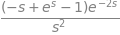

In [25]:
#q3
f = (t-1)*sympy.Heaviside(t-1) + (1-t)*sympy.Heaviside(t-2)
display(sympy.laplace_transform(f, t, s)[0])

In [54]:
#q4a
F = 1/s
display(sympy.inverse_laplace_transform(F, s, t))

In [53]:
#q4b
F = 10/(s**2 + 25) + 4/(s-3)
display(sympy.inverse_laplace_transform(F, s, t))

In [55]:
#q4c
F = sympy.exp(-3*s)*(2*s + 7)/(s**2 + 16)
display(sympy.inverse_laplace_transform(F, s, t))

In [48]:
#q4d
F = (s**2 + 5*s -3)/((s**2 +16)*(s-2))
display(sympy.inverse_laplace_transform(F, s, t))

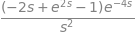

In [33]:
#q5
f = (t-2)*sympy.Heaviside(t-2) + (2-t)*sympy.Heaviside(t-4)
display(sympy.laplace_transform(f, t, s)[0])

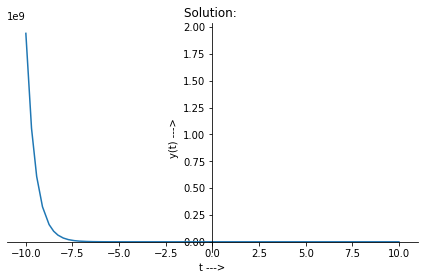

In [71]:
#q6a
t, s, Y = sympy.symbols('t, s, Y', positive=True)
f = 4*t
F = sympy.laplace_transform(f, t, s)[0]
Y1 = s*Y - 3
Sol = sympy.solvers.solve(Y1 + 2*Y - F, Y)
y = sympy.inverse_laplace_transform(Sol[0], s, t)
display(y)
plt.plot(y, xlabel='t --->', ylabel='y(t) --->', title='Solution: ')

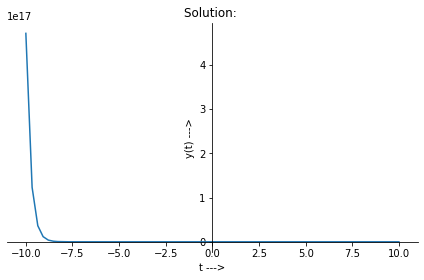

In [72]:
#q6b
t, s, Y = sympy.symbols('t, s, Y', positive=True)
f = (12*sympy.Heaviside(t-1) - 12*sympy.Heaviside(t-3))
F = sympy.laplace_transform(f, t, s)[0]
Y1 = s*Y -2
sol = sympy.solvers.solve(Y1 + 4*Y - F, Y)[0]
y = sympy.inverse_laplace_transform(sol, s, t)
display(y)
plt.plot(y, xlabel='t --->', ylabel='y(t) --->', title='Solution: ')

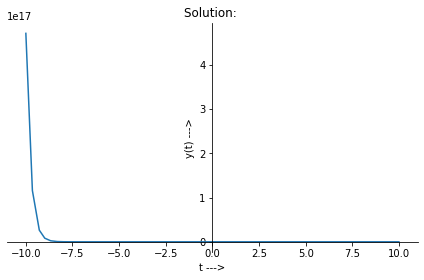

In [59]:
t, s, Y = sympy.symbols('t, s, Y', positive=True)
f = (12*sympy.Heaviside(t-1) - 12*sympy.Heaviside(t-3)) 
F = sympy.laplace_transform(f, t, s, noconds=True)
Y1 = s*Y - 2
sol = sympy.solvers.solve(Y1 + 4*Y - F, Y)
y = sympy.inverse_laplace_transform(sol[0], s, t)
display(y)
plt.plot(y, xlabel='t --->', ylabel='y(t) --->', title='Solution: ')

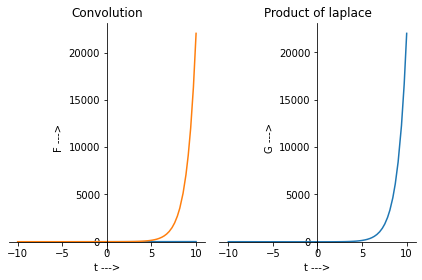

In [51]:
#q7
from sympy import oo

t, s, a = sympy.symbols('t, s, a', positive=True)
x = sympy.symbols('x')
f = t
f1 = sympy.exp(t)
F = sympy.integrate(f.subs(t, x)*f1.subs(t, t-x),(x, 0, oo))
G = sympy.inverse_laplace_transform(sympy.laplace_transform(f, t, s, noconds=True)*sympy.laplace_transform(f1, t, s, noconds=True), s, t, noconds=True)
p1 = plt.plot(t, F.subs({a:4}), xlabel='t --->', ylabel='F --->', title='Convolution', show=False)
p2 = plt.plot(G.subs({a:4}), xlabel='t --->', ylabel='G --->', title='Product of laplace', show=False)
plt.PlotGrid(1, 2, p1, p2)
